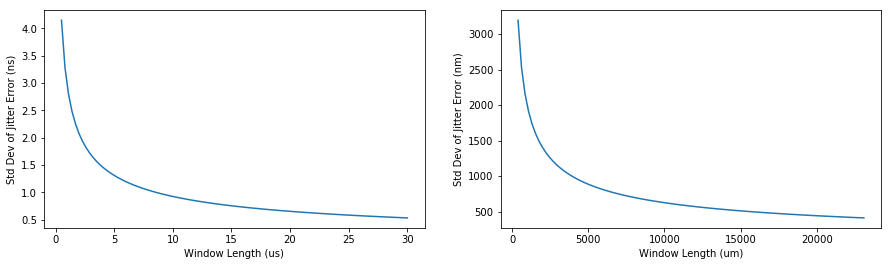

In [2]:
# this is an estimation on the lower bound for jitter error incurred when estimating delays
# using radio frequency data from speckle targets. It's derived from the Cramer-Rao Lower Bound,
# and the expression was presented in the paper, "A Fundamental Limit on Delay Estimation Using
# Partially Correlated Speckle Signals" by Walker and Trahey, 1995. See equation 20.
import numpy as np
import matplotlib.pyplot as plt

# using parameters from the paper, let's confirm their result
center_freq = 5e6
bandwidth_fractional = 0.5
speed_sound = 1540
corr_coef = 0.98
snr_db = 30
corr_window_duration = np.linspace(0.5e-6, 30e-6, 100)

fc = center_freq
T = corr_window_duration
BW = bandwidth_fractional
rho = corr_coef
snr = 10**(snr_db/10)

# this expression can be used in the dips_track_1d.ipynb for an estimation of jitter
# standard deviation.
jitter_t = np.sqrt(3/(2*fc**3*np.pi**2*T*(BW**3 + 12*BW))*(1/rho**2*(1+1/snr)**2-1))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[15,4])
ax1.plot(T*1e6, jitter_t*1e9)
ax1.set_xlabel('Window Length (us)')
ax1.set_ylabel('Std Dev of Jitter Error (ns)')
ax2.plot(T*speed_sound/2*1e6, jitter_t*speed_sound/2*1e9)
ax2.set_xlabel('Window Length (um)')
ax2.set_ylabel('Std Dev of Jitter Error (nm)')
plt.show()



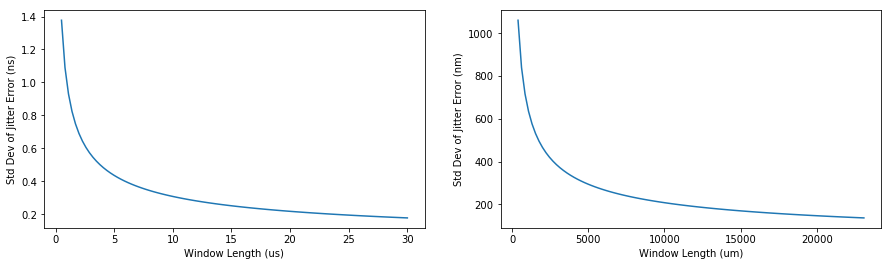

In [3]:
# According to a review paper by Nightingale, "Acoustic Radiation Force Impulse Imaging: 
# A Review" (2011), the following parameters should yield estimates of minimum axial 
# displacement "on the order of tenths of microns". The following "typical
# diagnostic ultrasound data" is used. Given that the minimum displacement estimated is near 200 nm,
# the expression and its usage is again verified.

center_freq = 7.2e6
bandwidth_fractional = 0.7
speed_sound = 1540
corr_coef = 0.99
snr_db = 45
corr_window_duration = np.linspace(0.5e-6, 30e-6, 100)

fc = center_freq
T = corr_window_duration
BW = bandwidth_fractional
rho = corr_coef
snr = 10**(snr_db/10)

jitter_t = np.sqrt(3/(2*fc**3*np.pi**2*T*(BW**3 + 12*BW))*(1/rho**2*(1+1/snr)**2-1))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[15,4])
ax1.plot(T*1e6, jitter_t*1e9)
ax1.set_xlabel('Window Length (us)')
ax1.set_ylabel('Std Dev of Jitter Error (ns)')
ax2.plot(T*speed_sound/2*1e6, jitter_t*speed_sound/2*1e9)
ax2.set_xlabel('Window Length (um)')
ax2.set_ylabel('Std Dev of Jitter Error (nm)')
plt.show()


